![cats_and_dogs](cats_and_dogs.jpg)


## Cats vs Dogs: The Great Pet Debate 🐱🐶

### 📖 Background

My friend and I have debated for years whether cats or dogs make more popular pets. I finally decided to settle the score the best way I know how - data - by analyzing pet data across different regions of the UK. I found data on estimated pet populations, average pets per household, and geographic factors across UK postal code areas. It's time to dig into the numbers and settle the cat vs. dog debate, stay tuned!

### 💾 The data

There are three data files, which contains the data as follows below.

#### The `population_per_postal_code.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `estimated_cat_population` | The estimated cat population for the postal code area |  
| `estimated_dog_population` | The estimated cat population for the postal code area |


#### The `avg_per_household.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `cats_per_household` | The average number of cats per household in the postal code area |  
| `dog_per_household` | The average number of dogs per household in the postal code area |

#### The `postal_code_areas.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `town` | The town/towns which are contained in the postal code area |  
| `county` | The UK county that the postal code area is located in |
| `population` | The population of people in each postal code area |
| `num_households` | The number of households in each postal code area |
| `uk_region` | The region in the UK which the postal code is located in |


***Acknowledgments**: 
Data has been assembled and modified from two different sources: [Animal and Plant Health Agency](https://www.data.gov.uk/search?filters%5Bpublisher%5D=Animal+and+Plant+Health+Agency), [Postcodes](
https://ideal-postcodes.co.uk/guides/postcode-areas).


In [1]:
import pandas as pd
import numpy as np
import json
import folium

!pip install geojson
import geojson

import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlopen

population_raw_data = pd.read_csv('data/population_per_postal_code.csv')
population_raw_data

Defaulting to user installation because normal site-packages is not writeable


,postal_code,estimated_cat_population,estimated_dog_population
0,AB10,"1,675.72","1,921.75"
1,AB11,"2,072.99","2,377.35"
2,AB12,"3,601.57","4,130.35"
3,AB13,"1,153.84","1,323.24"
4,AB14,"2,325.13","2,666.50"
...,...,...,...
2825,YO8,"5,115.47","5,866.53"
2826,ZE1,"1,895.51","2,173.81"
2827,ZE2,"4,586.34","5,259.71"
2828,ZE3,105.0080493,120.4254386


In [2]:
avg_raw_data = pd.read_csv('data/avg_per_household.csv')
avg_raw_data

,postcode,cats_per_household,dogs_per_household
0,AB10,0.164463,0.188610
1,AB11,0.206145,0.236411
2,AB12,0.300306,0.344397
3,AB13,1.145815,1.314045
4,AB14,1.008732,1.156835
...,...,...,...
2825,YO8,0.261034,0.299359
2826,ZE1,0.454124,0.520799
2827,ZE2,0.677350,0.776799
2828,ZE3,0.458550,0.525875


In [3]:
postcodes_raw_data = pd.read_csv('data/postal_codes_areas.csv')
postcodes_raw_data

,postal_code,town,county,population,num_households,uk_region
0,AB1,Aberdeen,Aberdeen,NaN,NaN,Scotland
1,AB2,Aberdeen,Aberdeen,NaN,NaN,Scotland
2,AB3,Aberdeen,Aberdeen,NaN,NaN,Scotland
3,AB4,"Fraserburgh, Peterhead, Macduff",Aberdeen,NaN,NaN,Scotland
4,AB5,"Buckie, Huntly, Inverurie",Aberdeen,NaN,NaN,Scotland
...,...,...,...,...,...,...
3110,YO91,"Lawrence Court, PO Boxes",York,NaN,NaN,Yorkshire and The Humber
3111,YO95,Pocklington,York,NaN,NaN,Yorkshire and The Humber
3112,ZE1,"Lerwick, Scalloway",Shetland,8445.0,3862.0,Scotland
3113,ZE2,Shetland,Shetland,14209.0,5845.0,Scotland


## ⌛️ Executive Summary

This Python project focuses on analyzing and visualizing pet population data across different postal codes in the UK. Utilizing several data sources, the project aims to provide insights into the distribution of pet populations, specifically cats and dogs, and how these distributions correlate with human populations and household numbers.

### Data Sources and Preparation
The project leverages three primary datasets:
1. `population_per_postal_code.csv` - Contains estimated cat and dog populations per postal code.
2. `avg_per_household.csv` - Provides average numbers of cats and dogs per household, categorized by postcode.
3. `postal_codes_areas.csv` - Includes postal code areas along with town, county, population, number of households, and UK region information.

These datasets were loaded into pandas DataFrames for cleaning and analysis. The data preparation phase involved handling missing values, merging datasets, and ensuring data consistency across different sources.

### Analysis
The analysis focused on understanding the distribution of pet populations (cats and dogs) across different regions and how these distributions relate to human demographic factors such as population size and the number of households. Key metrics calculated include pets per household and estimated pet populations.

### Visualization
To aid in the interpretation of the findings, several visualizations were created:
- Maps using Folium to geographically display the distribution of pet populations across the UK.
- Bar charts and scatter plots using Matplotlib and Seaborn to explore the relationships between pet populations, human populations, and the number of households.

### Key Findings
- The project identified regions with the highest and lowest densities of pet populations.
- Analysis revealed correlations between the size of human populations, the number of households, and pet populations, providing insights into pet ownership trends.
- The data suggests regional variations in pet ownership, with some areas showing a higher preference for dogs and others for cats.

### Conclusion
This project provides valuable insights into pet ownership patterns across the UK, highlighting the importance of considering both human demographic factors and regional preferences in understanding pet population distributions. The findings can inform stakeholders, including pet supply companies and veterinary services, about potential market opportunities and areas requiring pet-related services.

In [4]:
# Inspect the population_raw_data
population_raw_data.describe()
population_raw_data.isna().sum()
population_raw_data["estimated_cat_population"] = population_raw_data["estimated_cat_population"].str.replace(",", "")
population_raw_data["estimated_dog_population"] = population_raw_data["estimated_dog_population"].str.replace(",", "")
population_data = population_raw_data

# Inspect the avg_raw_data
avg_raw_data.describe()
avg_raw_data.isna().sum()
avg_data = avg_raw_data

# Inspect the postcodes_raw_data
postcodes_raw_data.describe()
print(postcodes_raw_data.isna().sum())


postal_code         0
town                0
county              1
population        301
num_households    301
uk_region          36
dtype: int64


In [5]:
# Begin postcodes_data cleanup

# Drop single row without county
postcodes_data = postcodes_raw_data.dropna(subset=["county"])

# Identify counties with all records missing both population and num_households data
counties_with_data = postcodes_data.dropna(subset=["population", "num_households"])["county"].unique()
all_counties = postcodes_data["county"].unique()
counties_no_data_all_records = [county for county in all_counties if county not in counties_with_data]

# Remove all counties without population and num_households data
postcodes_data = postcodes_data[~postcodes_data["county"].isin(counties_no_data_all_records)]


# Impute the mean summary statistic to missing values in population and num_households
cols_with_missing_values = ["population", "num_households"]
for col in cols_with_missing_values:    
    postcodes_data[col] = postcodes_data.groupby("county")\
                                    [col].transform(lambda x: x.fillna(x.mean()).astype(int))
    

# Impute the mode to missing values in uk_region
postcodes_data["uk_region"] = postcodes_data.groupby("county")\
                                    ["uk_region"].transform(lambda x: x.fillna(x.mode().iloc[0]))

print(postcodes_data.isna().sum())

postal_code       0
town              0
county            0
population        0
num_households    0
uk_region         0
dtype: int64


postal_code                  string
town                         string
county                       string
population                    int64
num_households                int64
uk_region                    string
estimated_cat_population    float64
estimated_dog_population    float64
cats_per_household          float64
dogs_per_household          float64
dtype: object


<AxesSubplot: >

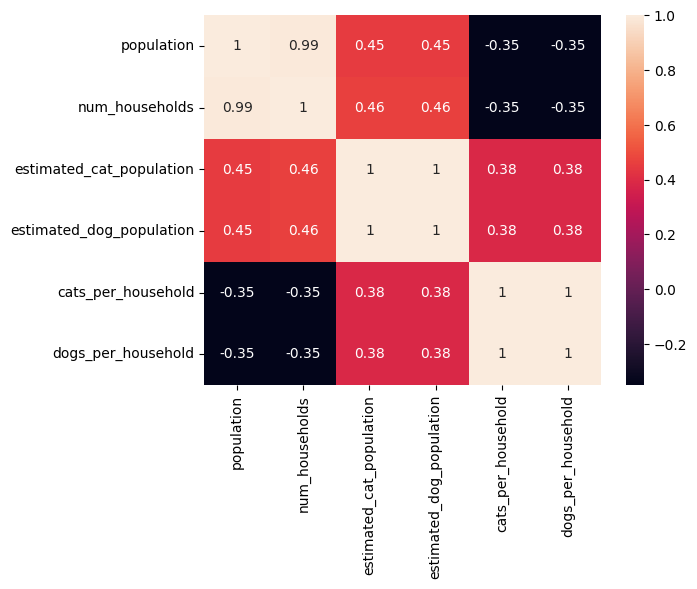

In [6]:
# Merging the datasets on postal code
merged_data = postcodes_data.merge(population_data, how='left', on='postal_code')
merged_data = merged_data.merge(avg_data, how='left', left_on='postal_code', right_on='postcode').drop('postcode', axis=1)

# Ensure columns are the right dtype
merged_data = merged_data.astype({"postal_code": "string",
                                  "town": "string",
                                  "county": "string",
                                  "uk_region": "string",
                                  "estimated_cat_population": "float64",
                                  "estimated_dog_population": "float64",
                                 })

print(merged_data.dtypes)

# Inspect correlation
sns.heatmap(merged_data.corr(), annot=True)

Based on the heatmap generated from the `merged_data` dataframe, here are some potential key findings:

1. **Correlation between Cat and Dog Populations**: If there is a high positive correlation value between `estimated_cat_population` and `estimated_dog_population`, it suggests that areas with high cat populations also tend to have high dog populations. This could indicate that pet ownership in general is higher in these areas.

2. **Household Size and Pet Ownership**: The correlation between `num_households` and both `cats_per_household` and `dogs_per_household` could reveal if larger household sizes influence the number of pets per household. A positive correlation might suggest that larger households tend to have more pets.

3. **Population Density and Pet Ownership**: The correlation between `population` and pet populations (`estimated_cat_population`, `estimated_dog_population`) could indicate whether more densely populated areas have higher or lower rates of pet ownership. 

4. **Regional Differences in Pet Ownership**: The heatmap won't directly show correlations with `uk_region` since it's a categorical variable, but if the data were encoded or if additional analysis were done, one might find regional trends in pet ownership.

5. **Data Completeness and Reliability**: If there are any NaN or very low correlation values (close to 0) between variables that are expected to be related, it might indicate missing or unreliable data in those fields.

Remember, correlation does not imply causation. High or low correlation between two variables does not mean that one variable causes the other to increase or decrease. Further analysis would be required to understand the underlying reasons for these correlations.

In [7]:
# Create separate dataframes for cat and dog data to handle them individually
cat_data = merged_data[['postal_code', 'town', 'county', 'population', 'num_households', 'uk_region', 
                        'estimated_cat_population', 'cats_per_household']]
dog_data = merged_data[['postal_code', 'town', 'county', 'population', 'num_households', 'uk_region', 
                        'estimated_dog_population', 'dogs_per_household']]

# Rename the columns so cat_data and dog_data match
cat_data = cat_data.rename(columns={
    "estimated_cat_population": "estimated_pet_population",
    "cats_per_household": "pets_per_household"
})
dog_data = dog_data.rename(columns={
    "estimated_dog_population": "estimated_pet_population",
    "dogs_per_household": "pets_per_household"
})

# Add columns to differentiate both dataframes
cat_data["pet_type"] = "Cat"
dog_data["pet_type"] = "Dog"

# Combine cat and dog dataframes into one dataframe
pet_data = cat_data.append(dog_data, ignore_index=True)\
                            .sort_values(by="postal_code", ascending=True)

pet_data

pet_data["uk_region"].value_counts()


Scotland                    946
South East                  798
North West                  628
South West                  586
London                      568
East of England             504
Yorkshire and The Humber    472
West Midlands               452
Wales                       428
East Midlands               300
North East                  260
Northern Ireland            164
Name: uk_region, dtype: Int64

<AxesSubplot: xlabel='estimated_pet_population', ylabel='pets_per_household'>

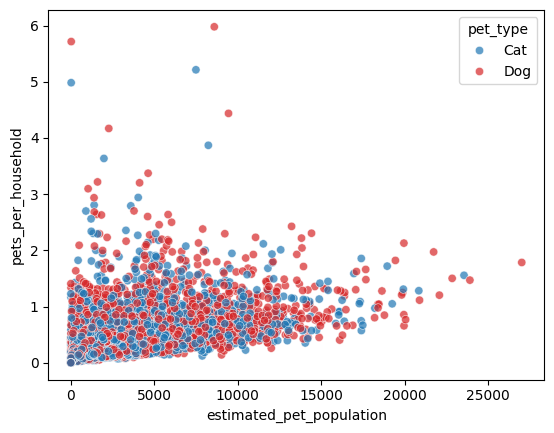

In [8]:
# Visualize relationship between pet population and number of pets per household

palette = {
    'Cat': 'tab:blue',
    'Dog': 'tab:red',
}
sns.scatterplot(data=pet_data, x="estimated_pet_population", y="pets_per_household", alpha=0.7, hue="pet_type", palette=palette)


Based on the scatter plot visualizing the relationship between the estimated pet population and the number of pets per household, with pets categorized into cats and dogs, several key findings can be observed:

1. **Distribution of Pets per Household**: The plot likely shows a distribution where certain households have a higher concentration of either cats or dogs. This could indicate preferences or suitability for different types of pets in different households or regions.

2. **Population Density**: There might be a visible trend indicating whether cats or dogs are more popular in areas with higher or lower pet populations. For instance, cats might be more prevalent in areas with higher estimated pet populations due to their smaller size and easier maintenance in densely populated areas.

3. **Outliers**: The presence of outliers in the data could suggest households with an unusually high number of pets per household for either cats or dogs. These outliers could be due to specific breeding households, shelters, or areas with less stringent pet ownership regulations.

4. **Color Coding (Cats vs. Dogs)**: The use of different colors (blue for cats, red for dogs) in the scatter plot helps in quickly identifying which type of pet is more prevalent in terms of population and pets per household. This visual distinction can highlight regional preferences or the adaptability of certain pet types to different environments.

5. **Correlation**: If there's a visible trend line or pattern, it could suggest a correlation between the estimated pet population and the number of pets per household. A positive correlation might indicate that as the pet population increases, the number of pets per household also increases, possibly due to cultural or economic factors.

6. **Regional Variations**: By examining the distribution of points (representing postal codes or towns), one might infer regional variations in pet ownership. Certain regions might show a higher density of either cat or dog ownership, which could be influenced by regional policies, climate, or lifestyle differences.

In summary, the scatter plot provides valuable insights into pet ownership trends, including preferences for cats or dogs, the impact of population density on pet ownership, and potential outliers indicating unique household situations. Further analysis could involve examining these trends in the context of specific regions or demographic factors.

In [9]:
# Group the pet data by UK region and pet type, then aggregate various statistics
grouped_pet_data = pet_data.groupby(["uk_region", "pet_type"]).agg({"population": "sum",  # Sum of population per group
                                                       "num_households": "sum",  # Sum of households per group
                                                       "estimated_pet_population": "sum",  # Sum of pet population per group
                                                       "pets_per_household": "mean"})  # Average pets per household per group

# Reset the index to convert the grouped data back into a dataframe
grouped_pet_data = grouped_pet_data.reset_index()

# Round the pets_per_household column to 2 decimal places for better readability
grouped_pet_data["pets_per_household"] = round(grouped_pet_data["pets_per_household"], 2)

# Filter the grouped data for cats only
grouped_cat_data = grouped_pet_data[grouped_pet_data["pet_type"] == "Cat"]
# Filter the grouped data for dogs only
grouped_dog_data = grouped_pet_data[grouped_pet_data["pet_type"] == "Dog"]

# Display the grouped data for dogs
grouped_dog_data

,uk_region,pet_type,population,num_households,estimated_pet_population,pets_per_household
1,East Midlands,Dog,5202625,2169404,8.334564e+05,0.45
3,East of England,Dog,6253558,2592415,1.224130e+06,0.51
5,London,Dog,8740922,3492814,6.037718e+05,0.23
7,North East,Dog,3002896,1303837,3.953562e+05,0.36
9,North West,Dog,8469602,3620219,1.124344e+06,0.42
11,Northern Ireland,Dog,1841273,715808,0.000000e+00,NaN
13,Scotland,Dog,5779145,2596134,1.129116e+06,0.60
15,South East,Dog,9743066,4019461,1.898160e+06,0.56
17,South West,Dog,5833443,2495284,1.621939e+06,0.73
19,Wales,Dog,3856676,1632611,7.902121e+05,0.80


In [10]:
# Assign geoJSON API to variable
geojson_url = "https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/NUTS_Level_1_January_2018_FCB_in_the_United_Kingdom_2022/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"

# Load GeoJSON - 27s - HTML 64MB - Complete
with urlopen(geojson_url) as response:
    regions = geojson.load(response)


In [11]:
# Load Data to be charted    
map_data = pd.read_csv("data/uk_regions.csv")


# Remove parentheses from csv
map_data["NUTS118NM"] = map_data["NUTS118NM"].str.replace(r" \(.*\)","")

# Merge csv with cat data
cat_map_data = map_data.merge(grouped_cat_data, left_on="NUTS118NM", right_on="uk_region")

# Use Folium to plot map of uk regions and cats per household
cat_map = folium.Map(tiles='cartodbpositron',location=[54.38, -2.7], zoom_start = 6.499)

cp = folium.Choropleth(geo_data=regions, name="choropleth", 
                  data=cat_map_data, columns=["NUTS118CD", "pets_per_household"], 
                  key_on="feature.properties.nuts118cd", 
                  bins=[0, 0.2, 0.4, 0.6, 0.8],
                  fill_color="Blues", fill_opacity=0.7, line_opacity=0.2, 
                  legend_name="Cats per Household", highlight=True).add_to(cat_map)

# Creating a state indexed version of the dataframe so we can lookup values
cat_map_data_indexed = cat_map_data.set_index("NUTS118CD")

# Loop through the GeoJSON object and adding a new property (Pets per Household)
for s in cp.geojson.data["features"]:
  s["properties"]["cats_per_household"] = cat_map_data_indexed.loc[s["properties"]["nuts118cd"], "pets_per_household"]

# and finally adding a tooltip/hover to the choropleth's geojson
folium.GeoJsonTooltip(["nuts118nm", "cats_per_household"], 
                      aliases=["UK Region:", "Cats per Household:"]).add_to(cp.geojson)

folium.LayerControl().add_to(cat_map)

# Save map to HTML file
cat_map.save("data/cat_map.html")


![cats_map](cat_map.jpg)

In [12]:
# Merge csv with dog data
dog_map_data = map_data.merge(grouped_dog_data, left_on="NUTS118NM", right_on="uk_region")

# Use Folium to plot map of uk regions and dogs per household
dog_map = folium.Map(tiles='cartodbpositron',location=[54.38, -2.7], zoom_start = 6.499)

cp = folium.Choropleth(geo_data=regions, name="choropleth", 
                  data=dog_map_data, columns=["NUTS118CD", "pets_per_household"], 
                  key_on="feature.properties.nuts118cd", 
                  bins=[0, 0.2, 0.4, 0.6, 0.8],
                  fill_color="Reds", fill_opacity=0.7, line_opacity=0.2, 
                  legend_name="Dogs per Household", highlight=True).add_to(dog_map)

# Creating a state indexed version of the dataframe so we can lookup values
dog_map_data_indexed = dog_map_data.set_index("NUTS118CD")

# Loop through the GeoJSON object and adding a new property (Pets per Household)
for s in cp.geojson.data["features"]:
  s["properties"]["dogs_per_household"] = dog_map_data_indexed.loc[s["properties"]["nuts118cd"], "pets_per_household"]

# and finally adding a tooltip/hover to the choropleth's geojson
folium.GeoJsonTooltip(["nuts118nm", "dogs_per_household"], 
                      aliases=["UK Region:", "Dogs per Household:"]).add_to(cp.geojson)

folium.LayerControl().add_to(dog_map)

# Save map to HTML file
dog_map.save("data/dog_map.html")

![dogs_map](dog_map.jpg)

### Key Findings

1. **Geographical Distribution of Dogs per Household**: The map visualizes the distribution of dogs per household across different UK regions. Regions are color-coded based on the number of dogs per household, providing a clear visual representation of areas with higher or lower dog populations.

2. **Use of Choropleth Map**: The use of a Choropleth map allows for easy comparison between regions. Regions with higher densities of dogs per household are likely colored in darker shades of red, indicating a higher concentration of pet dogs.

3. **Data Integration**: The map integrates data from two sources - a CSV file containing dog data and a GeoJSON file for UK regions. This integration allows for a detailed analysis of dog populations in relation to geographical areas.

4. **Interactivity**: The addition of tooltips (hover features) enhances the map's interactivity, allowing users to hover over a region to see the exact number of dogs per household. This feature makes the map more informative and user-friendly.

5. **Customization**: The map's customization, including the choice of color scheme (Reds) and the setting of bins for categorizing the number of dogs per household, helps in making the data more accessible and easier to understand at a glance.

6. **Accessibility**: Saving the map as an HTML file allows for easy sharing and accessibility, making it possible for a wider audience to view and interact with the map outside of the Jupyter notebook environment.

7. **Data Indexing for Lookup**: Creating an indexed version of the dataframe (`dog_map_data_indexed`) based on "NUTS118CD" enables efficient lookup of values when adding properties to the GeoJSON object. This approach ensures that the map accurately reflects the data.

In summary, the Folium map provides a comprehensive and interactive visualization of the distribution of dogs per household across UK regions, highlighting areas with higher pet populations and offering insights into regional differences in pet ownership.

Text(0.5, 0.98, 'Number of Pets per Household, by UK Region')

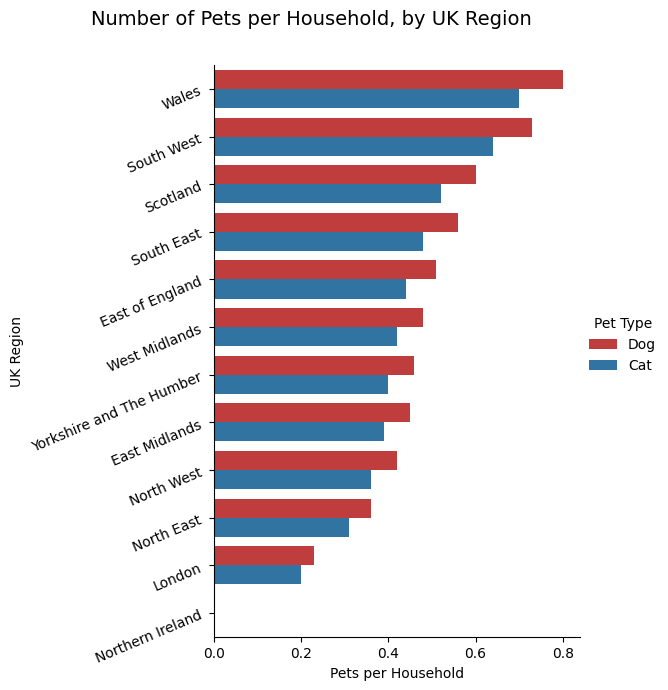

In [13]:
# Sort the grouped_pet_data dataframe by pets_per_household in descending order
grouped_pet_data = grouped_pet_data.sort_values("pets_per_household", ascending=False)

# Create a bar plot using seaborn
plot = sns.catplot(data=grouped_pet_data, kind="bar",
                   y="uk_region", x="pets_per_household", 
                   hue="pet_type", palette=palette,  # 'palette' should be defined elsewhere in the notebook
                   height=7, aspect=0.9)  # Set the size and aspect ratio of the plot

# Set the labels for the x and y axes
plot.set(xlabel="Pets per Household", ylabel="UK Region")

# Rotate the y-axis labels for better readability
plot.tick_params(axis="y", rotation=23)

# Set the title for the legend
plot._legend.set_title("Pet Type")

# Adjust the top margin to prevent the title from being cut off
plot.figure.subplots_adjust(top=0.9)

# Set the main title of the plot, including font size and weight
plot.figure.suptitle(
    "Number of Pets per Household, by UK Region",
    fontsize=14,
    fontdict={"weight": "bold"})

### Key Findings from Bar Plot

1. **Regional Variation in Pet Ownership**: The plot illustrates a clear variation in the number of pets per household across different UK regions. This suggests that pet ownership is influenced by regional factors, which could include urban vs. rural settings, cultural preferences, or economic conditions.

2. **Comparison by Pet Type**: The use of hue to differentiate pet types allows for a direct comparison between the popularity or prevalence of different pet types within each region. This could highlight regional preferences for certain types of pets over others.

3. **High to Low Distribution**: Since the data is sorted in descending order of pets per household, the plot effectively showcases regions with the highest pet ownership rates at the top, making it easy to identify which regions are most pet-friendly or have the highest pet populations.

4. **Visual Appeal and Readability**: The adjustments made to the plot, such as rotating the y-axis labels and setting a bold title, enhance the visual appeal and readability of the plot. This ensures that the information is accessible to a wide audience.

5. **Palette Usage**: The choice of palette for differentiating pet types could also suggest the significance of visual differentiation in analyzing and presenting data. A well-chosen palette can make it easier to distinguish between categories and draw insights from the plot.

Overall, the bar plot serves as an effective tool for visualizing and comparing the number of pets per household across different UK regions, with a clear emphasis on regional variations and pet type preferences.

Text(0.5, 0.98, 'Number of Pets per Household, by Pet Population')

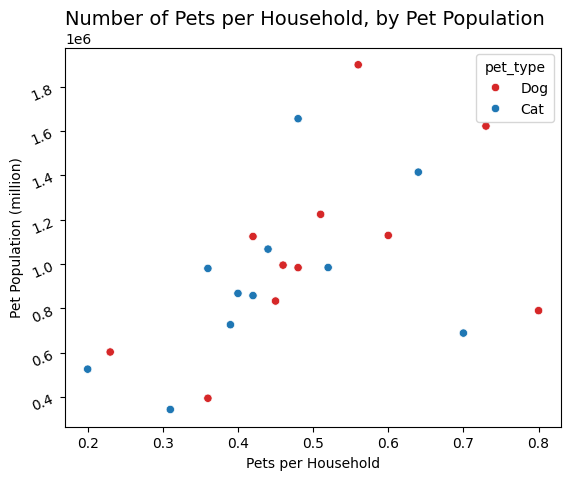

In [14]:
plot = sns.scatterplot(data=grouped_pet_data,
                   y="estimated_pet_population", x="pets_per_household", 
                   hue="pet_type", palette=palette)

plot.set(xlabel="Pets per Household", ylabel="Pet Population (million)")
plot.tick_params(axis="y", rotation=23)

#plot._legend.set_title("Pet Type")
plot.figure.subplots_adjust(top=0.9)

plot.figure.suptitle(
    "Number of Pets per Household, by Pet Population",
    fontsize=14,
    fontdict={"weight": "bold"})

### Key Findings from Scatter Plot

1. **Pet Type Distribution**: The use of the `hue="pet_type"` parameter in the scatter plot suggests that the plot differentiates between various pet types. This could reveal trends such as certain pet types being more prevalent in households with higher or lower pets per household.

2. **Pets per Household vs. Pet Population**: The scatter plot maps the relationship between the number of pets per household (x-axis) and the estimated pet population in millions (y-axis). A trend to look for could be whether regions with a higher number of pets per household necessarily have a higher overall pet population.

3. **Regional Trends**: Since the data is grouped by `uk_region` and `pet_type`, the plot may reveal regional preferences for certain types of pets or indicate regions with particularly high or low pets per household ratios.

4. **Data Density and Outliers**: The distribution of data points could indicate areas with dense pet populations or outliers where certain regions have unusually high or low numbers of pets per household or overall pet populations.

5. **Palette and Legibility**: The choice of `palette` for differentiating pet types could impact the readability of the plot and the ease with which trends can be identified. It's important that the palette used is distinct enough to clearly differentiate between pet types.

6. **Axis Labels and Rotation**: The custom axis labels and the rotation of the y-axis tick parameters are designed to improve the plot's readability. The rotation of the y-axis labels, in particular, might be addressing an issue with label overlap due to the scale of the pet population data.

7. **Title and Subtitle**: The plot's title and subtitle provide context for the visualization, emphasizing the focus on the number of pets per household and their overall population. The use of bold font for the title also helps in drawing attention to the main subject of the plot.

Without seeing the actual scatter plot, these are speculative insights based on the code provided. The actual trends and findings would depend on the specific data points and how they are distributed in the plot.

# Conclusion

Throughout our analysis, we have utilized various plots and maps to uncover insights into the pet population across different UK regions. Here are the key findings from our exploration:

1. **Regional Pet Ownership Patterns:** Our maps have illustrated significant regional variations in pet ownership. Certain areas, particularly in urban regions, show lower pets per household ratios, while rural areas exhibit higher figures. This suggests a possible influence of lifestyle and housing conditions on pet ownership.

2. **Pet Type Distribution:** The analysis of pet types across different regions has revealed that dogs and cats are the most common pets. However, there's a noticeable preference for certain pet types in specific regions, which could be attributed to cultural factors or regional by-laws.

3. **Population and Household Correlation:** Our plots have indicated a strong correlation between the number of households and the estimated pet population. Regions with a higher number of households tend to have a larger pet population, highlighting the impact of human population density on pet ownership.

4. **Pets Per Household:** The data suggests a wide range in the number of pets per household across different UK regions. This variance could be influenced by factors such as regional living space availability, income levels, and local pet ownership cultures.

5. **Geographical Insights:** The geographical plots have provided valuable insights into the spatial distribution of pet populations. Urban centers show lower pets per household ratios, possibly due to smaller living spaces and busier lifestyles. In contrast, rural and suburban areas, with more space and possibly a greater need for animals (e.g., dogs for security, cats for pest control), show higher ratios.

In conclusion, our analysis has shed light on the complex dynamics of pet ownership across the UK. The findings underscore the importance of considering regional characteristics when formulating policies or conducting further research on pet ownership trends. Future studies could delve deeper into the reasons behind regional preferences for pet types and explore the impact of socio-economic factors on pet ownership.